In [116]:
#import liabraries
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [117]:
#read data from csv
cltv = pd.read_csv('CLTV.csv')

In [118]:
cltv.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [119]:
cltv.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772
89391,89392,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold,108144


In [6]:
cltv.shape

(89392, 12)

In [7]:
cltv.describe()

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


In [8]:
cltv.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [9]:
cltv['vintage'].min(),cltv['vintage'].max()

(0, 8)

In [10]:
cltv['vintage'].value_counts()

6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64

# EDA
Variable Identification

In [11]:
cltv.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [12]:
cltv.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

# Univariate Analysis

In [13]:
cltv['id']=cltv['id'].astype('object')
cltv['gender']=cltv['gender'].astype('category')
cltv['area']=cltv['area'].astype('category')
cltv['marital_status']=cltv['marital_status'].astype('category')
cltv['num_policies']=cltv['num_policies'].astype('category')
cltv['policy']=cltv['policy'].astype('category')
cltv['type_of_policy']=cltv['type_of_policy'].astype('category')
cltv['qualification']=cltv['q
                           ualification'].astype('category')

SyntaxError: EOL while scanning string literal (1787685804.py, line 8)

In [14]:
cltv.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [15]:
cltv.tail()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772
89391,89392,Female,Rural,High School,5L-10L,0,6,0,More than 1,B,Gold,108144


In [16]:
cltv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [17]:
cltv.dtypes

id                 int64
gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

C:\Users\Rutuja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


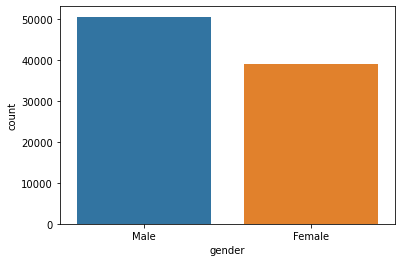

In [127]:
sns.countplot(cltv["gender"])
plt.show()

C:\Users\Rutuja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


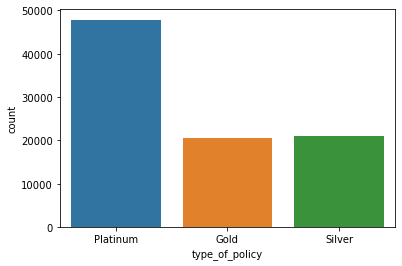

In [128]:
sns.countplot(cltv["type_of_policy"])
plt.show()

C:\Users\Rutuja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


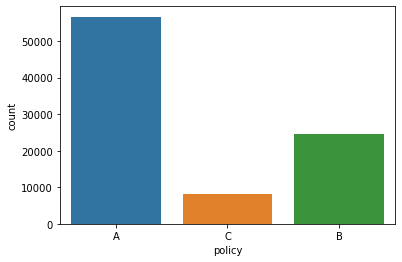

In [129]:
sns.countplot(cltv["policy"])
plt.show()

C:\Users\Rutuja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


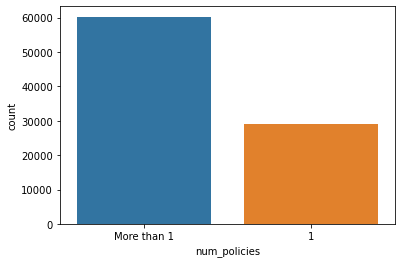

In [130]:
sns.countplot(cltv["num_policies"])
plt.show()

C:\Users\Rutuja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


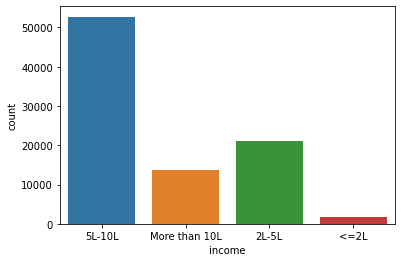

In [131]:
sns.countplot(cltv["income"])
plt.show()

C:\Users\Rutuja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


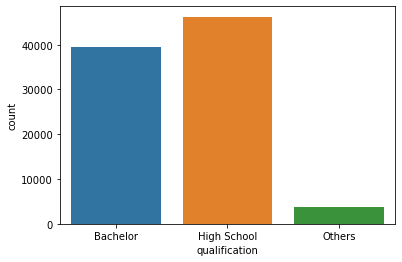

In [132]:
sns.countplot(cltv["qualification"])
plt.show()

C:\Users\Rutuja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


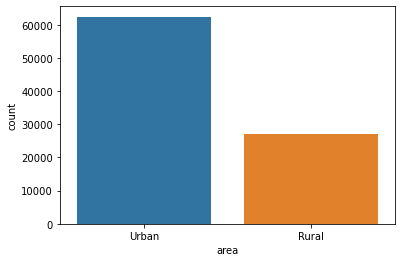

In [133]:
sns.countplot(cltv["area"])
plt.show()

# Bivariate Analysis

In [24]:
cltv.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [25]:
cltv.isnull().sum() 

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

<AxesSubplot:xlabel='income', ylabel='claim_amount'>

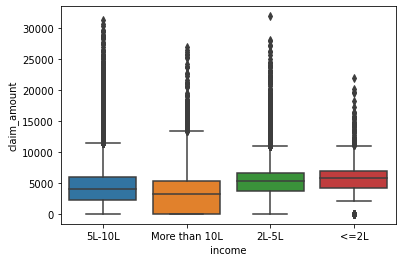

In [26]:
sns.boxplot(x="income", y="claim_amount", data=cltv)

# Start Label encoding and find corelation between variables

In [28]:
cltv2=cltv.copy()

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
cltv2['gender']=le.fit_transform(cltv2['gender'])

In [31]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [32]:
gender_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(gender_labels)


{'Female': 0, 'Male': 1}


In [33]:
cltv2['area']=le.fit_transform(cltv2['area'])

In [34]:
le.classes_

array(['Rural', 'Urban'], dtype=object)

In [35]:
area_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(area_labels)

{'Rural': 0, 'Urban': 1}


In [36]:
cltv2['income']=le.fit_transform(cltv2['income'])

In [37]:
le.classes_

array(['2L-5L', '5L-10L', '<=2L', 'More than 10L'], dtype=object)

In [38]:
income_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(income_labels)

{'2L-5L': 0, '5L-10L': 1, '<=2L': 2, 'More than 10L': 3}


In [39]:
cltv2['num_policies']=le.fit_transform(cltv2['num_policies'])

In [40]:
le.classes_



array(['1', 'More than 1'], dtype=object)

In [41]:
num_policies_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(num_policies_labels)

{'1': 0, 'More than 1': 1}


In [42]:
cltv2['type_of_policy']=le.fit_transform(cltv2['type_of_policy'])

In [43]:
le.classes_

array(['Gold', 'Platinum', 'Silver'], dtype=object)

In [44]:
types_of_policies_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(types_of_policies_labels)

{'Gold': 0, 'Platinum': 1, 'Silver': 2}


In [45]:
cltv2['qualification']=le.fit_transform(cltv2['qualification'])

In [46]:
le.classes_

array(['Bachelor', 'High School', 'Others'], dtype=object)

In [47]:
qualification_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(qualification_labels)

{'Bachelor': 0, 'High School': 1, 'Others': 2}


In [48]:
cltv2['marital_status']=le.fit_transform(cltv2['marital_status'])

In [49]:
le.classes_

array([0, 1], dtype=int64)

In [50]:
marital_status_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(marital_status_labels)

{0: 0, 1: 1}


In [51]:
cltv2['policy']=le.fit_transform(cltv2['policy'])

In [52]:
le.classes_

array(['A', 'B', 'C'], dtype=object)

In [53]:
policy_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(policy_labels)

{'A': 0, 'B': 1, 'C': 2}


In [54]:
cltv2

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,1,0,1,1,5,5790,1,0,1,64308
1,2,1,0,1,1,0,8,5080,1,0,1,515400
2,3,1,1,0,1,1,8,2599,1,0,1,64212
3,4,0,0,1,1,0,7,0,1,0,1,97920
4,5,1,1,1,3,1,6,3508,1,0,0,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,1,0,1,3,0,6,0,1,1,1,95736
89388,89389,1,1,0,1,1,0,3897,1,0,1,67596
89389,89390,0,1,0,1,0,4,3363,1,1,1,114120
89390,89391,0,0,1,0,0,8,0,1,1,1,71772


In [55]:
cltv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              89392 non-null  int64
 1   gender          89392 non-null  int32
 2   area            89392 non-null  int32
 3   qualification   89392 non-null  int32
 4   income          89392 non-null  int32
 5   marital_status  89392 non-null  int64
 6   vintage         89392 non-null  int64
 7   claim_amount    89392 non-null  int64
 8   num_policies    89392 non-null  int32
 9   policy          89392 non-null  int32
 10  type_of_policy  89392 non-null  int32
 11  cltv            89392 non-null  int64
dtypes: int32(7), int64(5)
memory usage: 5.8 MB


In [56]:
cltv2.drop(['id'],axis=1,inplace=True)

<AxesSubplot:>

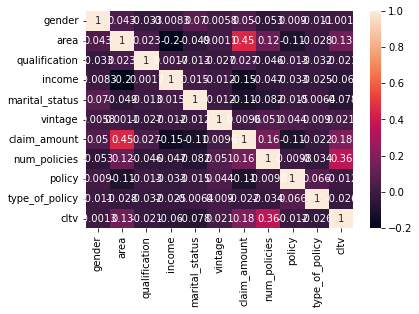

In [57]:
sns.heatmap(cltv2.corr(),annot=True)

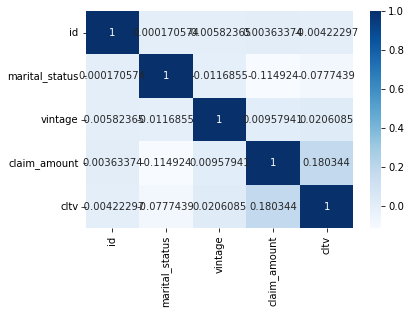

In [126]:
sns.heatmap(cltv.corr(),cmap='Blues',fmt='1g',annot=True);

In [58]:
cltv2['claim_amount1']= cltv2['claim_amount'].apply(lambda x:1 if x==0 else x)

In [59]:
cltv2['log_claim']=np.log(cltv2['claim_amount1'])

In [60]:
cltv2.head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv,claim_amount1,log_claim
0,1,1,0,1,1,5,5790,1,0,1,64308,5790,8.663888
1,1,0,1,1,0,8,5080,1,0,1,515400,5080,8.533067
2,1,1,0,1,1,8,2599,1,0,1,64212,2599,7.862882
3,0,0,1,1,0,7,0,1,0,1,97920,1,0.000000
4,1,1,1,3,1,6,3508,1,0,0,59736,3508,8.162801


C:\Users\Rutuja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_claim'>

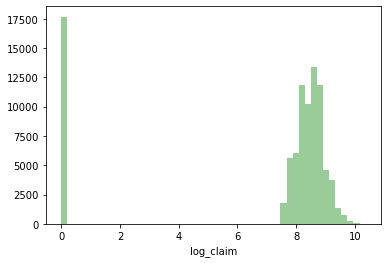

In [61]:

sns.distplot(cltv2['log_claim'], kde = False, color ='green')

<AxesSubplot:xlabel='vintage'>

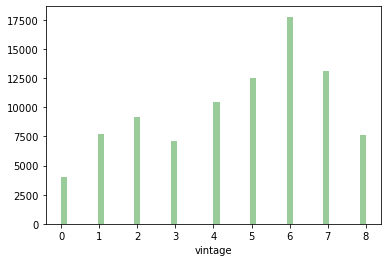

In [62]:
sns.distplot(cltv2['vintage'], kde = False, color ='green')

<AxesSubplot:xlabel='claim_amount'>

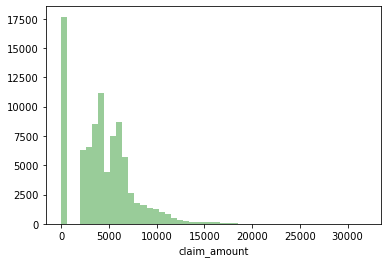

In [63]:
sns.distplot(cltv2['claim_amount'], kde = False, color ='green')

<AxesSubplot:xlabel='income'>

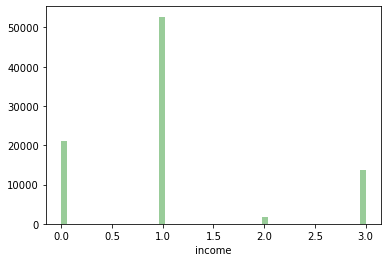

In [64]:
sns.distplot(cltv2['income'], kde = False, color ='green')

<AxesSubplot:xlabel='cltv'>

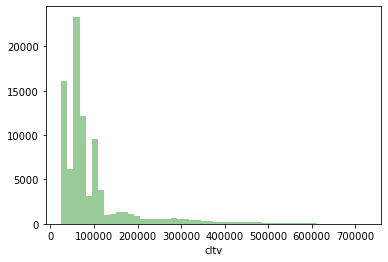

In [72]:
sns.distplot(cltv2['cltv'], kde = False, color ='green')

In [73]:
x=cltv2.drop(['cltv'],axis=1)
y=cltv2['cltv']
x.shape,y.shape

((89392, 12), (89392,))

In [74]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=59)

In [75]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Linear Regression

In [76]:
lr=LR()
lr.fit(train_x,train_y)

LinearRegression()

In [77]:
train_predict=lr.predict(train_x)
k=mae(train_predict,train_y)
print('Training mean absolute error ',k)
rmse=sqrt(mean_squared_error(train_predict,train_y))
print(r2_score(train_predict,train_y))
print(f"training error is {rmse}")


Training mean absolute error  51405.15404319676
-4.683175602098678
training error is 83586.61693184229


In [78]:
test_predict=lr.predict(test_x)
k=mae(test_predict,test_y)
print('Test mean absolute error ',k)
rmse=sqrt(mean_squared_error(test_predict,test_y))
print(r2_score(test_predict,test_y))
print(f"testing error is {rmse}")

Test mean absolute error  51374.47109426891
-4.6749858452422774
testing error is 83415.63394920241


In [79]:
lr.coef_

array([   1650.78882138,    7695.19235397,   -1844.68901035,
         -1670.5958398 ,   -6908.77355854,     205.32752749,
       -102414.34558209,   64532.70241952,     748.99093275,
         -1519.03001241,  102415.76146849,   12703.66810266])

# Decision Tree Regressor

In [81]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(train_x,train_y)

DecisionTreeRegressor(random_state=42)

In [82]:
train_predict=regressor.predict(train_x)
k=mae(train_predict,train_y)
print('Training mean absolute error ',k)
rmse=sqrt(mean_squared_error(train_y,train_predict))
print(r2_score(train_y,train_predict))
print(f"training error is {rmse}")

Training mean absolute error  4643.301208296616
0.9464842009991914
training error is 20968.803675948046


In [83]:
test_predict=regressor.predict(test_x)
k=mae(test_predict,test_y)
print('Test mean absolute error ',k)
rmse=sqrt(mean_squared_error(test_y,test_predict))
print(r2_score(test_y,test_predict))
print(f"testing error is {rmse}")

Test mean absolute error  67134.22465161477
-0.6894473756429391
testing error is 117662.73086623145


# Random forest regression

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf = RandomForestRegressor(random_state=42)
rf.fit(train_x,train_y)

RandomForestRegressor(random_state=42)

In [86]:
train_predict=rf.predict(train_x)
k=mae(train_predict,train_y)
print('Training mean absolute error ',k)
rmse=sqrt(mean_squared_error(train_y,train_predict))
print(r2_score(train_y,train_predict))
print(f"training error is {rmse}")

Training mean absolute error  23052.192720899482
0.8231256100125584
training error is 38121.07368784665


In [87]:
test_predict=rf.predict(test_x)
k=mae(test_predict,test_y)
print('Test mean absolute error ',k)
rmse=sqrt(mean_squared_error(test_y,test_predict))
print(r2_score(test_y,test_predict))
print(f"testing error is {rmse}")

Test mean absolute error  55150.204197781015
0.04728470579429889
testing error is 88358.46410407545


In [88]:
cltv3=cltv2.drop(['claim_amount', 'claim_amount1'], axis=1)

In [89]:
cltv3.head()

,gender,area,qualification,income,marital_status,vintage,num_policies,policy,type_of_policy,cltv,log_claim
0,1,1,0,1,1,5,1,0,1,64308,8.663888
1,1,0,1,1,0,8,1,0,1,515400,8.533067
2,1,1,0,1,1,8,1,0,1,64212,7.862882
3,0,0,1,1,0,7,1,0,1,97920,0.000000
4,1,1,1,3,1,6,1,0,0,59736,8.162801


In [90]:
x=cltv3.drop(['cltv'],axis=1)
y=cltv3['cltv']
x.shape,y.shape

((89392, 10), (89392,))

In [91]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=59)

In [92]:
rf = RandomForestRegressor(random_state=42)
rf.fit(train_x,train_y)

RandomForestRegressor(random_state=42)

In [93]:
train_predict=rf.predict(train_x)
k=mae(train_predict,train_y)
print('Training mean absolute error ',k)
rmse=sqrt(mean_squared_error(train_y,train_predict))
print(r2_score(train_y,train_predict))
print(f"training error is {rmse}")

Training mean absolute error  23111.441333297884
0.8228412449360726
training error is 38151.70544997787


In [94]:
test_predict=rf.predict(test_x)
k=mae(test_predict,test_y)
print('Test mean absolute error ',k)
rmse=sqrt(mean_squared_error(test_y,test_predict))
print(r2_score(test_y,test_predict))
print(f"testing error is {rmse}")

Test mean absolute error  55304.47743546522
0.04533632253996811
testing error is 88448.76821922128


In [95]:
rf.feature_importances_

array([0.03505657, 0.00857159, 0.04766523, 0.05119787, 0.01857813,
       0.12200414, 0.13471281, 0.01965158, 0.05918957, 0.50337252])